In [7]:
import pandas as pd

# Load the CSV
df = pd.read_csv(r"D:\codex techno project\4th--Sentiment Analysis\Data\archive (5)\Twitter_Data.csv")

# Quick view
print(df.shape)
print(df.columns)
df.head()


(162980, 2)
Index(['clean_text', 'category'], dtype='object')


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
# Check data types and missing values
df.info()
df.isnull().sum()

# Check class distribution
df['category'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [15]:
df = df.dropna(subset=['clean_text'])  # Use 'text' if you're using that column



In [14]:
df = df.dropna(subset=['clean_text'])  


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# Use the column that contains clean text (or preprocess if it's not available)
X_text = df['clean_text']  # Change to 'text' if 'clean_text' doesn't exist
y = df['category']

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(X_text).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df.columns)



Index(['clean_text', 'category'], dtype='object')


In [29]:
df = df.dropna(subset=['clean_text', 'category'])


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

model = MultinomialNB()  # Try others too
model.fit(X_train, y_train)



MultinomialNB()

              precision    recall  f1-score   support

        -1.0       0.92      0.41      0.57      7152
         0.0       0.87      0.68      0.76     11067
         1.0       0.66      0.95      0.78     14375

    accuracy                           0.74     32594
   macro avg       0.82      0.68      0.70     32594
weighted avg       0.79      0.74      0.73     32594



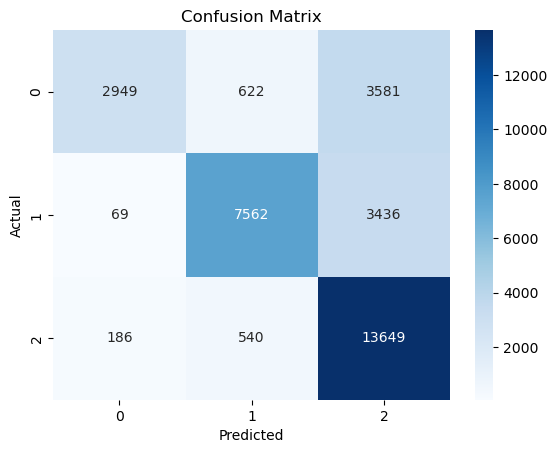

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


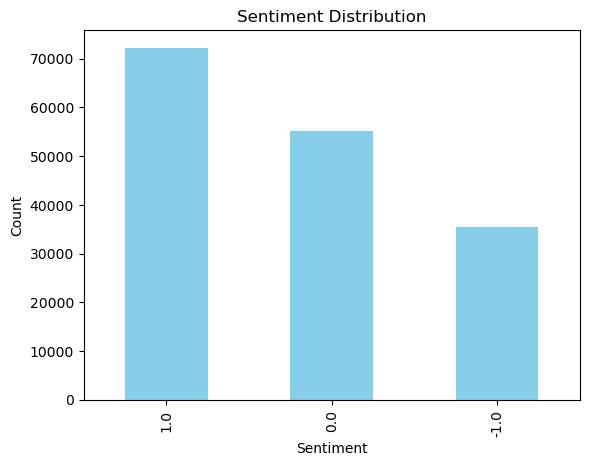

In [34]:
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



### Sentiment Distribution

From the sentiment distribution plot:

- **Positive Sentiment (1.0)**: ~72,000 tweets  
  → Majority of users express positive opinions.
  
- **Neutral Sentiment (0.0)**: ~56,000 tweets  
  → Many tweets are neutral, possibly informative or emotionless.

- **Negative Sentiment (-1.0)**: ~34,000 tweets  
  → A significant portion is negative, highlighting potential concerns or dissatisfaction.

**Insight:** Overall public sentiment is mostly **positive**, but there is a considerable amount of **negative sentiment** that businesses or brands should monitor closely.
